In [0]:
!pip install tensorflow==1.14.0

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [1]:
from google.colab import drive #STU NAPERVILLE ACCOUNTS DON'T WORK - USE YOUR PERSONAL GOOGLE ACCOUNTS
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#FORMATTING DATA SET (not tested)
#https://medium.com/@muskulpesent/create-numpy-array-of-images-fecb4e514c4b&sa=D&source=hangouts&ust=1582390259517000&usg=AFQjCNFIlPagqjM75QyaHiorDWqaazaL5g
train_images = []
train_labels = []
test_images = []
test_labels = []

files = glob.glob("/content/training/*.png")
for myFile in files:
  image = cv2.imread(myFile)
  train_images.append(image)
  train_labels.append(image[0])
train_images = np.array(train_images, dtype='float32')
train_labels = np.array(train_labels, dtype='float64')

files2 = glob.glob("/content/tests/*.png")
for myFile in files2:
  image = cv2.imread(myFile)
  test_images.append(image)
  test_labels.append(image[0])
test_images = np.array(test_images, dtype='float32')
test_labels = np.array(test_labels, dtype='float64')

In [0]:
#mnist = keras.datasets.mnist
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print("shape before: " + str(np.shape(train_images)))
train_images = np.reshape(train_images, (train_images.len(), 28, 28, 3))
print("shape after: " + str(np.shape(train_images)))
test_images = np.reshape(test_images, (10000, 28, 28, 3))

shape before: (60000, 28, 28)
shape after: (60000, 28, 28, 1)


In [0]:
train_images = train_images / 255.
test_images = test_images / 255.

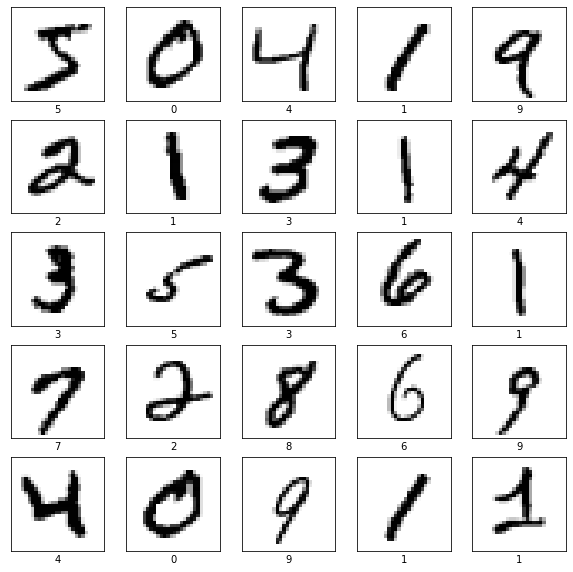

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(train_images[i], (28,28)), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [0]:
model = keras.Sequential([
  layers.Conv2D(14, 3, activation='relu', input_shape=(28,28,3)),
  layers.Conv2D(28, 3, activation='relu'),
  layers.Flatten(),
  layers.Dense(200, activation='relu'),
  layers.Dense(2, activation='softmax'), #classification layer; 0 for none 1 for stop
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x=train_images,y=train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=128)

model.save_weights('/content/model.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1485 - acc: 0.9543 - val_loss: 0.0605 - val_acc: 0.9809
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0428 - acc: 0.9865 - val_loss: 0.0428 - val_acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0231 - acc: 0.9926 - val_loss: 0.0384 - val_acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0407 - val_acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0091 - acc: 0.9972 - val_loss: 0.0444 - val_acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0460 - val_acc: 0.9867
Epoch 7/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0072 - acc: 0.9975 - val_loss: 0

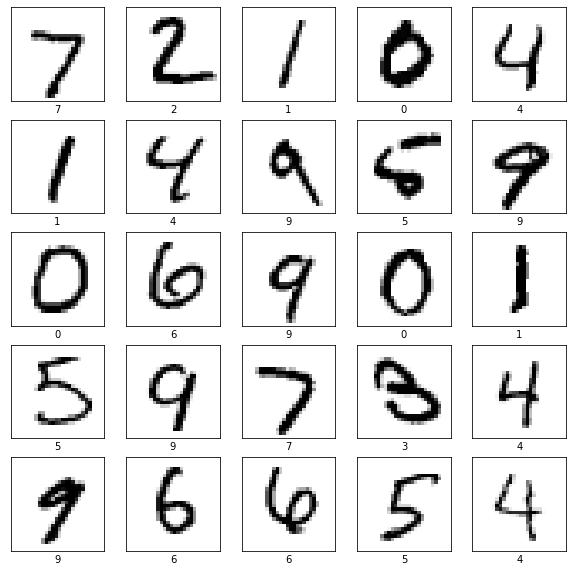

In [0]:
predictions = np.argmax(model.predict(test_images), axis=1)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(test_images[i], (28,28)), cmap=plt.cm.binary)
    plt.xlabel(predictions[i])
plt.show()